# ML - Homework 3

**Author: Marusic Diana (331)**

## Task 1


Strategy: train network on first column and test on second ?

TODO: use test_generator for test with loaded model

### Import libraries

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
import cv2

from skimage import data
from skimage import filters
from skimage import measure
import math
from skimage import exposure

from random import seed
from random import randint
from numpy import array
from math import ceil
from math import log10
from math import sqrt
from numpy import argmax
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import RepeatVector
from sklearn.metrics import mean_squared_error
from tensorflow.keras.preprocessing.sequence import pad_sequences


from data_generator import training_generator,test_generator


## Generate training samples

In [0]:
NR_SAMPLES = 10000
generator = training_generator(batch_size=NR_SAMPLES) # batch size of 8

x, numbers, numbers_sum = next(generator)

In [0]:
print(numbers[0:3])
print(numbers_sum[0:3])
# print(x[0:3])
print(x.shape)

[[251 105]
 [ 37   4]
 [144  80]]
[[356]
 [ 41]
 [224]]
(10000, 2, 28, 84)


### Plot generated images

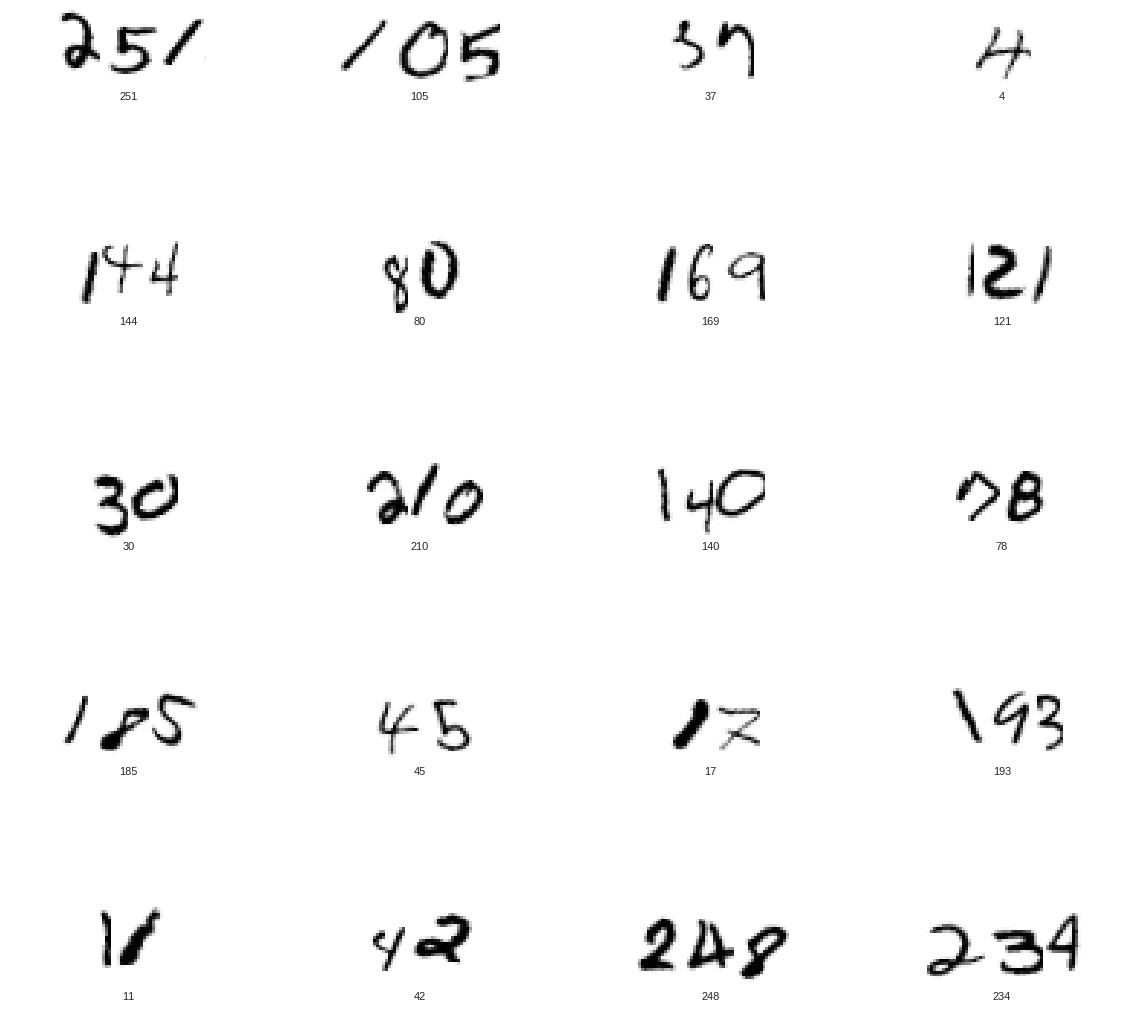

In [0]:

x_train = x
y_train = numbers


plt.figure(figsize=(20,20))
nr = 0

for i in range(min(len(y_train),10)):
  for j in range(2):
    plt.subplot(5,4,nr+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x[i][j])    
    plt.xlabel(y_train[i][j])
    nr+=1


### Separate columns

In [0]:
def separate_columns(X, numbers):
  X_first = x[:,:1]
  X_second = x[:,1:]
  numbers_first = numbers[:,:1]
  numbers_second = numbers[:,1:]
  
  return X_first, X_second, numbers_first, numbers_second
  
x_first, x_second, numbers_first, numbers_second = separate_columns(x, numbers)

print("First column of numbers:")
print(numbers_first[0:3])
# print(x_first[0:3])
print("x_first shape:")
print(x_first.shape)

print("Second column of numbers:")
print(numbers_second[0:3])
# print(x_second[0:3])
print("x_second shape:")
print(x_second.shape)



First column of numbers:
[[251]
 [ 37]
 [144]]
x_first shape:
(10000, 1, 28, 84)
Second column of numbers:
[[105]
 [  4]
 [ 80]]
x_second shape:
(10000, 1, 28, 84)


In [0]:
# print(x_first[0])
# print(x[0])
x_first = x_first.reshape((NR_SAMPLES,28,84))


### Function to return number of digits in an integer

In [0]:

def nrOfDigits(n):
  if n<10:
    return 1
  return int(math.log10(n))+1


### Digits segmentation

### TODO: explain

### TODO: choose only correct segmented examples for training the neural network

[0 1 2]
67
2
28
Correct!


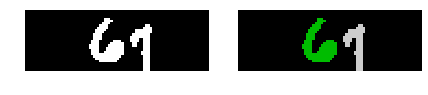

[0 1 2 3]
164
3
28
Correct!


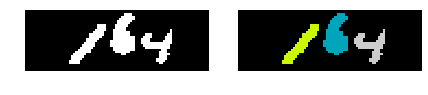

[0 1 2 3]
254
3
28
Correct!


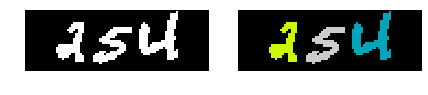

[0 1 2 3]
223
3
28
Correct!


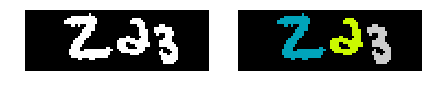

[0 1 2 3]
147
3
28
Correct!


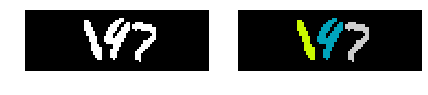

[0 1 2]
233
3
28
Wrong!


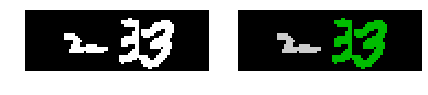

[0 1 2]
23
2
28
Correct!


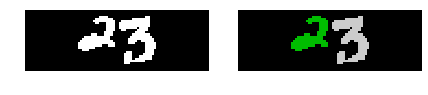

[0 1 2]
41
2
28
Correct!


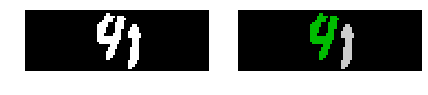

[0 1 2 3]
251
3
28
Correct!


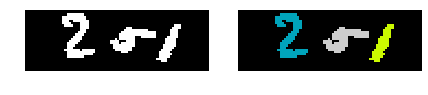

[0 1 2]
24
2
28
Correct!


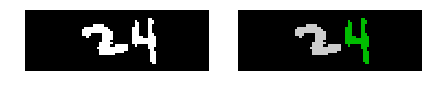

[0 1 2]
51
2
28
Correct!


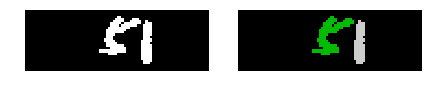

[0 1 2]
31
2
28
Correct!


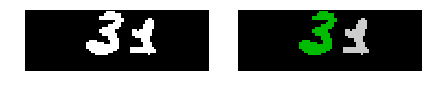

[0 1 2]
22
2
28
Correct!


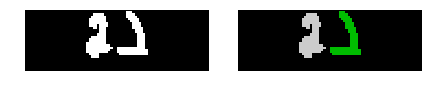

[0 1 2 3]
247
3
28
Correct!


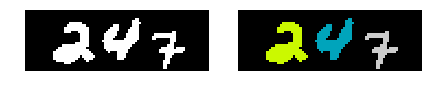

[0 1]
9
1
28
Correct!


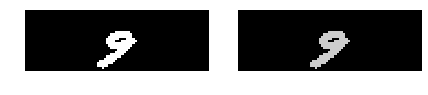

[0 1 2 3]
160
3
28
Correct!


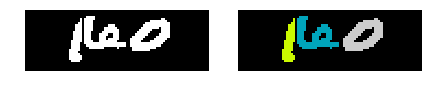

[0 1 2]
39
2
28
Correct!


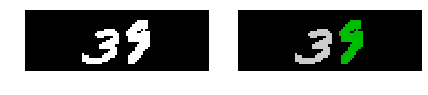

[0 1 2 3]
108
3
28
Correct!


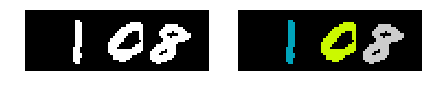

[0 1 2 3]
206
3
28
Correct!


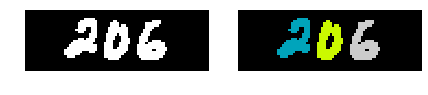

[0 1 2]
52
2
28
Correct!


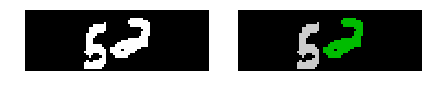

Correct segmented numbers:
19 out of 20
0.95 %
[0 1 2]
67
2
28
Correct!


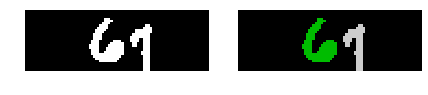

[0 1 2 3]
164
3
28
Correct!


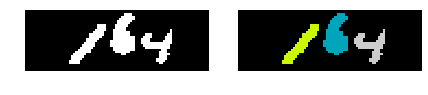

[0 1 2 3]
254
3
28
Correct!


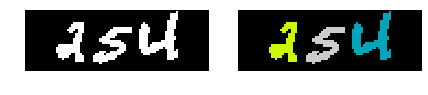

[0 1 2 3]
223
3
28
Correct!


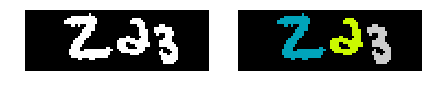

[0 1 2 3]
147
3
28
Correct!


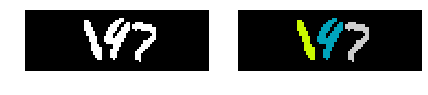

[0 1 2]
233
3
28
Wrong!


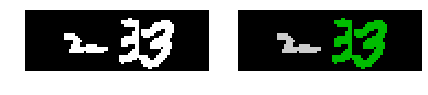

[0 1 2]
23
2
28
Correct!


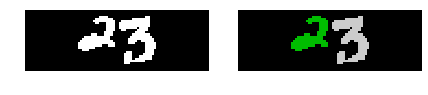

[0 1 2]
41
2
28
Correct!


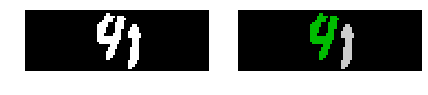

[0 1 2 3]
251
3
28
Correct!


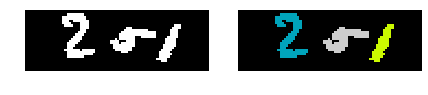

[0 1 2]
24
2
28
Correct!


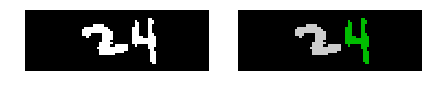

[0 1 2]
51
2
28
Correct!


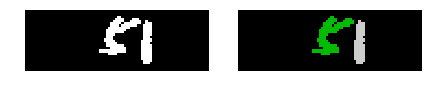

[0 1 2]
31
2
28
Correct!


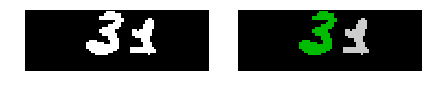

[0 1 2]
22
2
28
Correct!


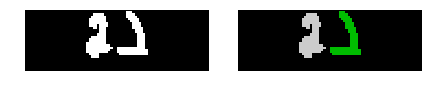

[0 1 2 3]
247
3
28
Correct!


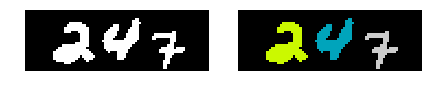

[0 1]
9
1
28
Correct!


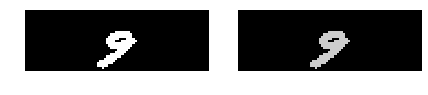

[0 1 2 3]
160
3
28
Correct!


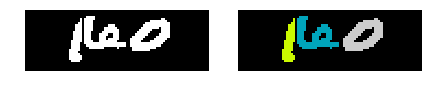

[0 1 2]
39
2
28
Correct!


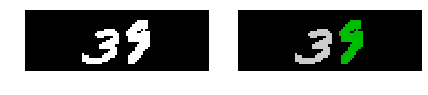

[0 1 2 3]
108
3
28
Correct!


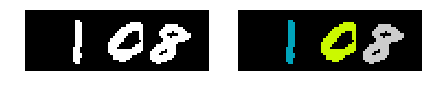

[0 1 2 3]
206
3
28
Correct!


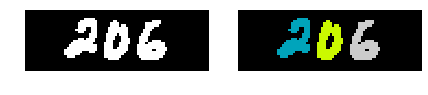

[0 1 2]
52
2
28
Correct!


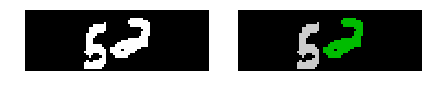

Correct segmented numbers:
19 out of 20
0.95 %
[0 1 2]
67
2
28
Correct!


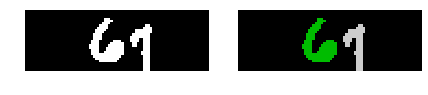

[0 1 2 3]
164
3
28
Correct!


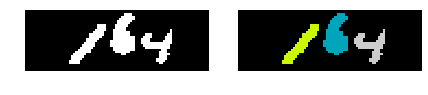

[0 1 2 3]
254
3
28
Correct!


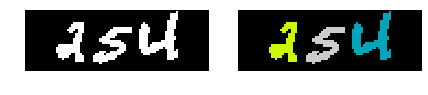

[0 1 2 3]
223
3
28
Correct!


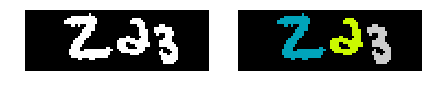

[0 1 2 3]
147
3
28
Correct!


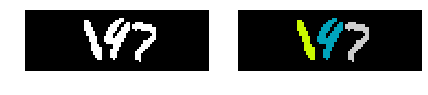

[0 1 2]
233
3
28
Wrong!


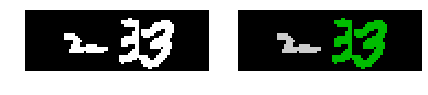

[0 1 2]
23
2
28
Correct!


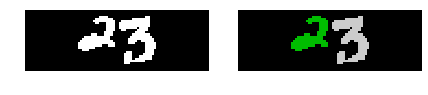

[0 1 2]
41
2
28
Correct!


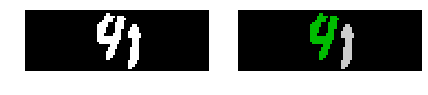

[0 1 2 3]
251
3
28
Correct!


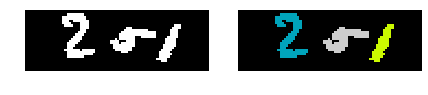

[0 1 2]
24
2
28
Correct!


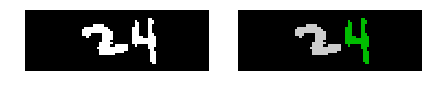

[0 1 2]
51
2
28
Correct!


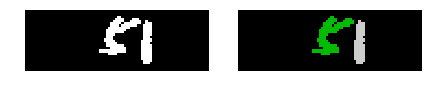

[0 1 2]
31
2
28
Correct!


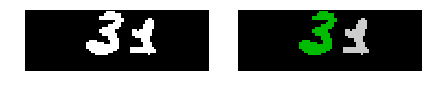

[0 1 2]
22
2
28
Correct!


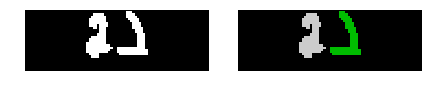

[0 1 2 3]
247
3
28
Correct!


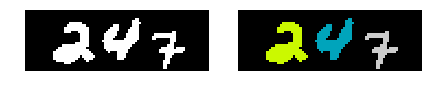

[0 1]
9
1
28
Correct!


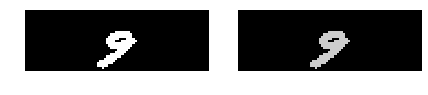

[0 1 2 3]
160
3
28
Correct!


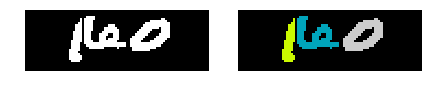

[0 1 2]
39
2
28
Correct!


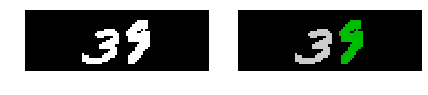

[0 1 2 3]
108
3
28
Correct!


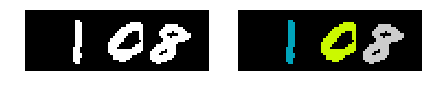

[0 1 2 3]
206
3
28
Correct!


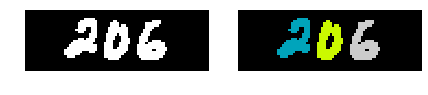

[0 1 2]
52
2
28
Correct!


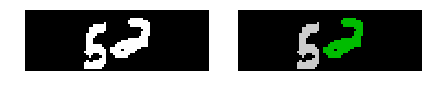

Correct segmented numbers:
19 out of 20
0.95 %
[0 1 2]
67
2
28
Correct!


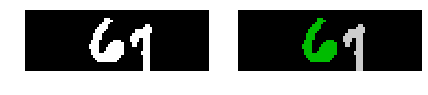

[0 1 2 3]
164
3
28
Correct!


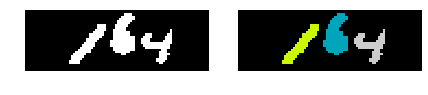

[0 1 2 3]
254
3
28
Correct!


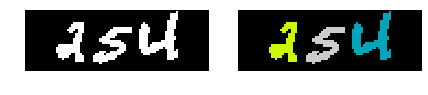

[0 1 2 3]
223
3
28
Correct!


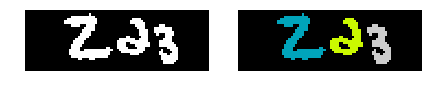

[0 1 2 3]
147
3
28
Correct!


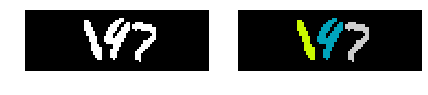

[0 1 2]
233
3
28
Wrong!


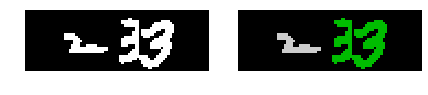

[0 1 2]
23
2
28
Correct!


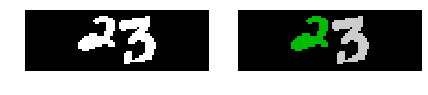

[0 1 2]
41
2
28
Correct!


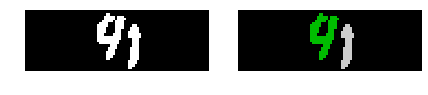

[0 1 2 3]
251
3
28
Correct!


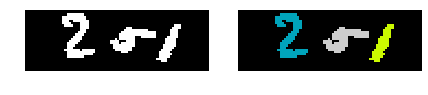

[0 1 2]
24
2
28
Correct!


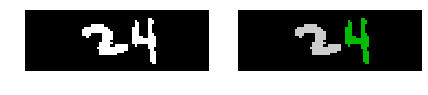

[0 1 2]
51
2
28
Correct!


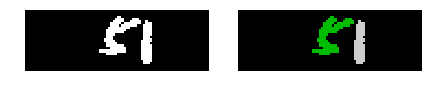

[0 1 2]
31
2
28
Correct!


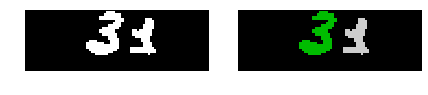

[0 1 2]
22
2
28
Correct!


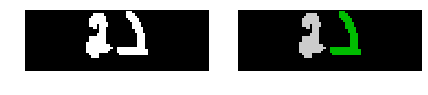

[0 1 2 3]
247
3
28
Correct!


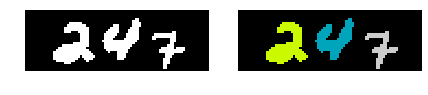

[0 1]
9
1
28
Correct!


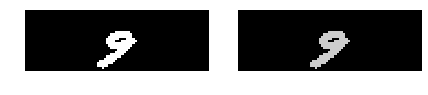

[0 1 2 3]
160
3
28
Correct!


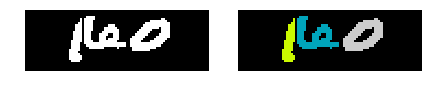

[0 1 2]
39
2
28
Correct!


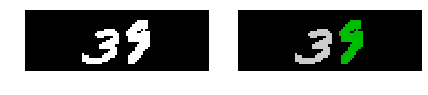

[0 1 2 3]
108
3
28
Correct!


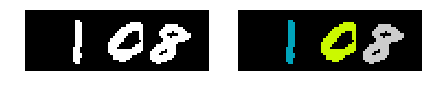

[0 1 2 3]
206
3
28
Correct!


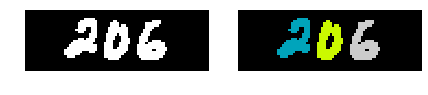

[0 1 2]
52
2
28
Correct!


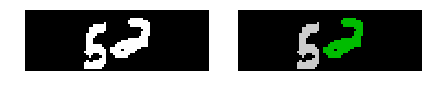

Correct segmented numbers:
19 out of 20
0.95 %
[0 1 2]
67
2
28
Correct!


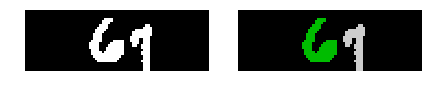

[0 1 2 3]
164
3
28
Correct!


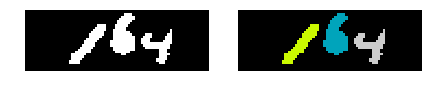

[0 1 2 3]
254
3
28
Correct!


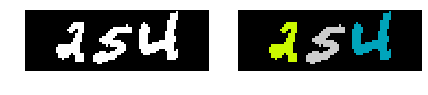

[0 1 2 3]
223
3
28
Correct!


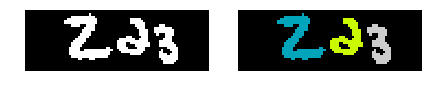

[0 1 2 3]
147
3
28
Correct!


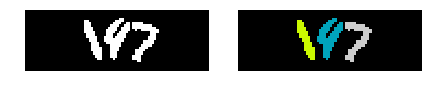

[0 1 2]
233
3
28
Wrong!


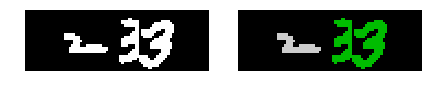

[0 1 2]
23
2
28
Correct!


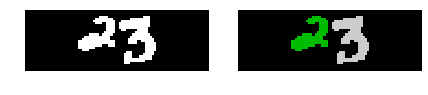

[0 1 2]
41
2
28
Correct!


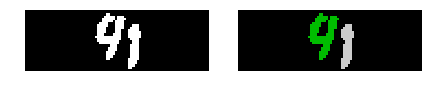

[0 1 2 3]
251
3
28
Correct!


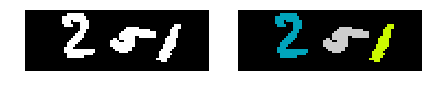

[0 1 2]
24
2
28
Correct!


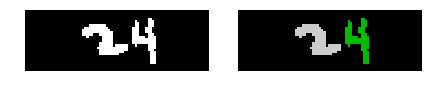

[0 1 2]
51
2
28
Correct!


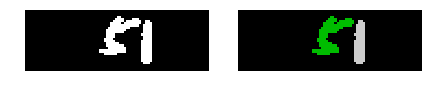

[0 1 2]
31
2
28
Correct!


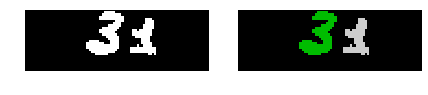

[0 1 2]
22
2
28
Correct!


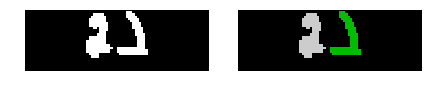

[0 1 2 3]
247
3
28
Correct!


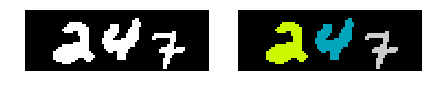

[0 1]
9
1
28
Correct!


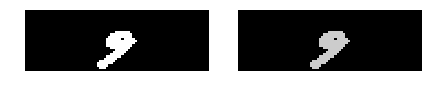

[0 1 2 3]
160
3
28
Correct!


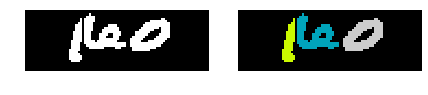

[0 1 2]
39
2
28
Correct!


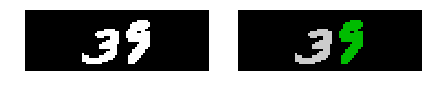

[0 1 2 3]
108
3
28
Correct!


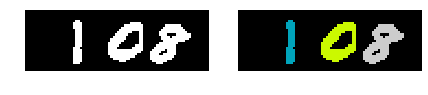

[0 1 2 3]
206
3
28
Correct!


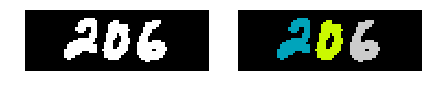

[0 1 2]
52
2
28
Correct!


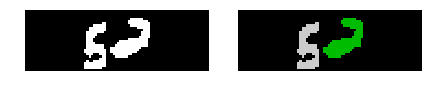

Correct segmented numbers:
19 out of 20
0.95 %
[0 1 2]
67
2
28
Correct!


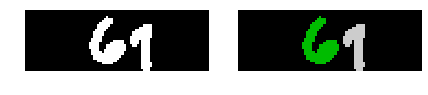

[0 1 2 3]
164
3
28
Correct!


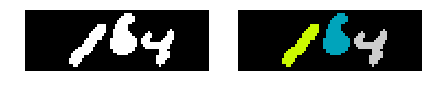

[0 1 2 3]
254
3
28
Correct!


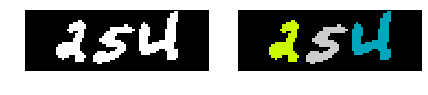

[0 1 2 3]
223
3
28
Correct!


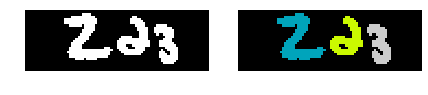

[0 1 2]
147
3
28
Wrong!


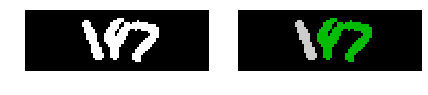

[0 1 2]
233
3
28
Wrong!


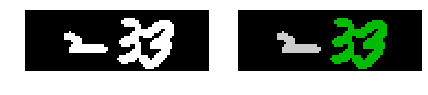

[0 1 2]
23
2
28
Correct!


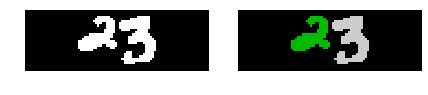

[0 1 2]
41
2
28
Correct!


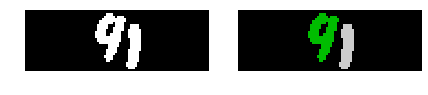

[0 1 2 3]
251
3
28
Correct!


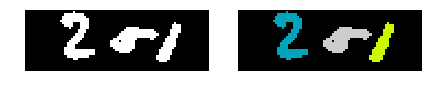

[0 1 2]
24
2
28
Correct!


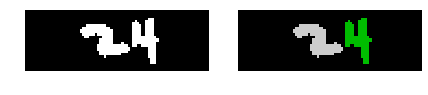

[0 1 2]
51
2
28
Correct!


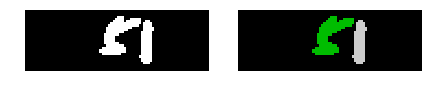

[0 1 2]
31
2
28
Correct!


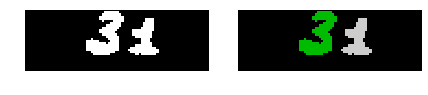

[0 1 2]
22
2
28
Correct!


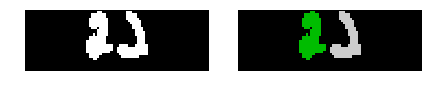

[0 1 2 3]
247
3
28
Correct!


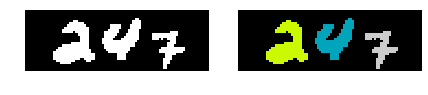

[0 1]
9
1
28
Correct!


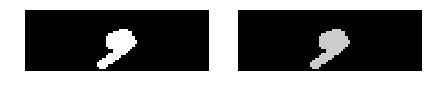

[0 1 2]
160
3
28
Wrong!


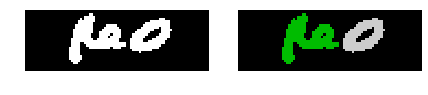

[0 1 2]
39
2
28
Correct!


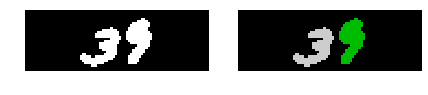

[0 1 2 3]
108
3
28
Correct!


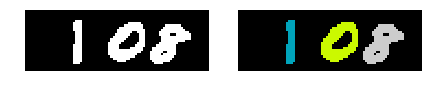

[0 1 2 3]
206
3
28
Correct!


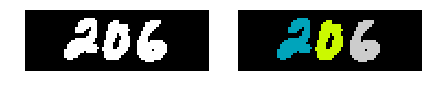

[0 1 2]
52
2
28
Correct!


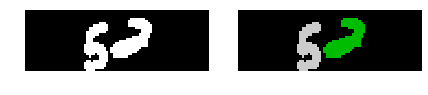

Correct segmented numbers:
17 out of 20
0.85 %
[0 1 2]
67
2
28
Correct!


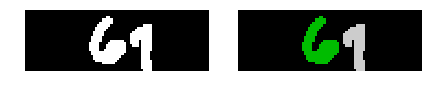

[0 1 2 3]
164
3
28
Correct!


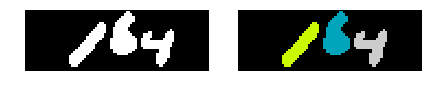

[0 1 2 3]
254
3
28
Correct!


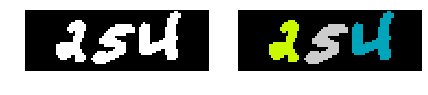

[0 1 2 3]
223
3
28
Correct!


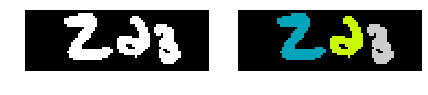

[0 1 2]
147
3
28
Wrong!


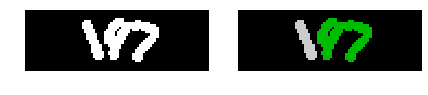

[0 1 2]
233
3
28
Wrong!


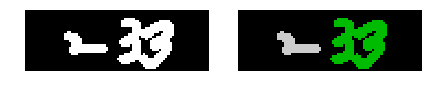

[0 1 2]
23
2
28
Correct!


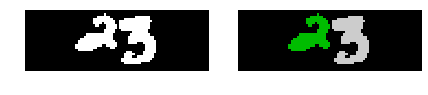

[0 1 2]
41
2
28
Correct!


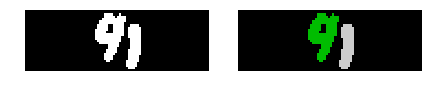

[0 1 2 3]
251
3
28
Correct!


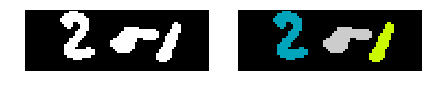

[0 1 2]
24
2
28
Correct!


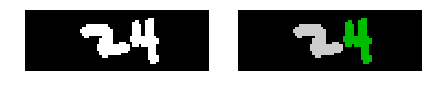

[0 1 2]
51
2
28
Correct!


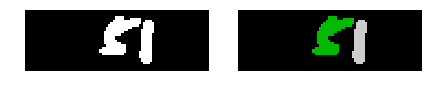

[0 1 2]
31
2
28
Correct!


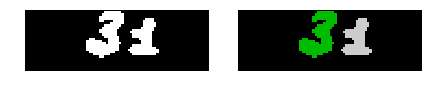

[0 1 2]
22
2
28
Correct!


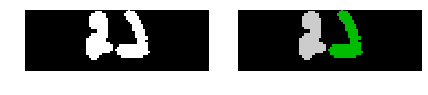

[0 1 2 3]
247
3
28
Correct!


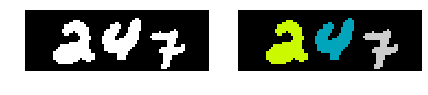

[0 1]
9
1
28
Correct!


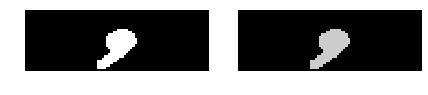

[0 1 2]
160
3
28
Wrong!


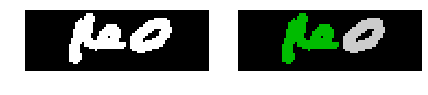

[0 1 2]
39
2
28
Correct!


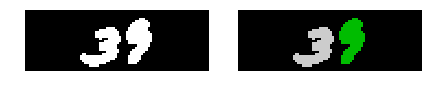

[0 1 2 3]
108
3
28
Correct!


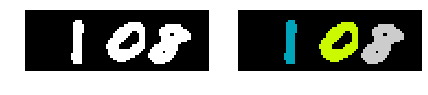

[0 1 2 3]
206
3
28
Correct!


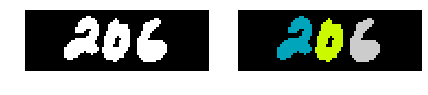

[0 1]
52
2
28
Wrong!


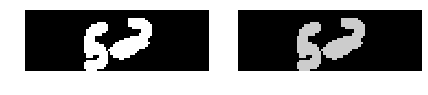

Correct segmented numbers:
16 out of 20
0.8 %


In [0]:
nr_correct_segments = []
percentage_segments = []

sigma_values = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
for sigma in sigma_values:

  nr_correct_segment = 0

  array_of_images = x_first[0:20]

  for (idx, im) in enumerate(array_of_images):
    im = filters.gaussian(im, sigma=sigma)

    blobs = im > 0.7 * im.mean()

    all_labels = measure.label(blobs)
    blobs_labels = measure.label(blobs, background=0)
    print(np.unique(blobs_labels))
    print(y_train[idx][0])
    nr_digits = nrOfDigits(y_train[idx][0])
    print(nr_digits)
    print(len(blobs_labels))

    if len(np.unique(blobs_labels)) == nr_digits+1:
      print("Correct!")
      nr_correct_segment += 1
    else:
      print("Wrong!")

    plt.figure(figsize=(9, 3.5))
    plt.subplot(131)
    plt.imshow(blobs, cmap='gray')
    plt.axis('off')
    plt.subplot(132)
    plt.imshow(blobs_labels, cmap='nipy_spectral')
    plt.axis('off')
#     plt.subplot(133)
#     plt.imshow(blobs_labels, cmap='hot')
#     plt.axis('off')

    plt.tight_layout()
    plt.show()

  print("Correct segmented numbers:")
  print(nr_correct_segment, 'out of', len(array_of_images))
  percentage_segment = (0.0+nr_correct_segment)/len(array_of_images)
  print(percentage_segment, '%')
  
  nr_correct_segments.append(nr_correct_segment)
  percentage_segments.append(percentage_segment)



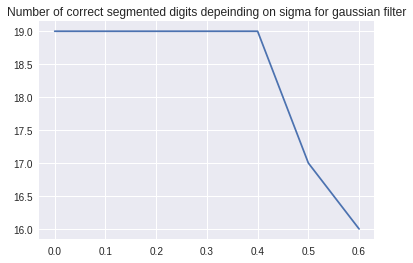

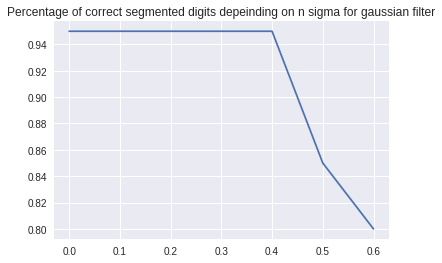

In [0]:
plt.plot(sigma_values, nr_correct_segments)
plt.title("Number of correct segmented digits depeinding on sigma for gaussian filter")
plt.show()

plt.plot(sigma_values, percentage_segments)
plt.title("Percentage of correct segmented digits depeinding on n sigma for gaussian filter")
plt.show()

#### Conclusion:
The smaller the sigma, the "thinner"  are the digits and the betteri is the segmentation.
So the value of **sigma=0.1** will be used next

## Create a function to segment digits, using the best sigma parameter identified

In [0]:
def segment_image(im, number):

  correct_segmentation = False
  
  sigma=0.1
  
  im = filters.gaussian(im, sigma=sigma)
  blobs = im > 0.9 * im.mean()

  blobs_labels = measure.label(blobs, background=0)
  distinct_labels = np.unique(blobs_labels)
  
  print(distinct_labels)
  print(number)
  nr_digits = nrOfDigits(number)
  print(nr_digits)
  print(len(blobs_labels))

  if len(distinct_labels) == nr_digits+1:
    print("Correct!")
    correct_segmentation = True
  else:
    print("Wrong!")

  plt.figure(figsize=(9, 3.5))
  plt.subplot(131)
  plt.imshow(blobs, cmap='gray')
  plt.axis('off')
  plt.subplot(132)
  plt.imshow(blobs_labels, cmap='nipy_spectral')
  plt.axis('off')
  plt.subplot(133)
  plt.imshow(blobs_labels, cmap='hot')
  plt.axis('off')

  plt.tight_layout()
  plt.show()

  image_digits = []
  
  for (i,label) in enumerate(distinct_labels[1:]):
    image_digit = np.where(blobs_labels==label, blobs_labels, 0)
    image_digits.append(image_digit)
    
  
  return image_digits, correct_segmentation
  
  
  
  

[0 1 2]
[37]
2
28
Correct!


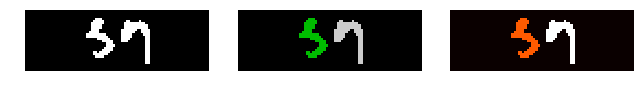

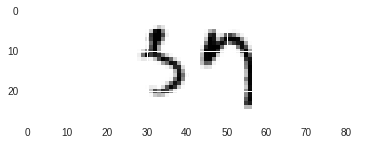

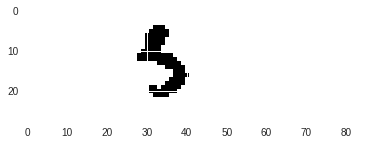

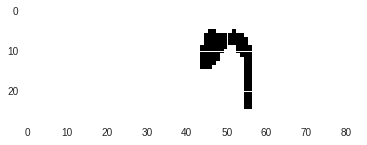

Is segmentation correct? True


In [0]:
image_digits, correct_segmentation = segment_image(x_first[1], numbers_first[1])

plt.imshow(x_first[1])
plt.show()
  
for image_digit in image_digits:
    plt.imshow(image_digit)
    plt.show()

print("Is segmentation correct?", correct_segmentation)
    

### Use a version of the segment image function with transposed images to identify digits in the correct order of their appearance (from left to right)

In [0]:
def segment_image_transpose(im, number, train=True, plot=True, verbose=True):
  
  correct_segmentation = False
  sigma = 0.1

  nr_correct_segment = 0
  
  im = np.transpose(im)
  
  im = filters.gaussian(im, sigma=sigma)
  blobs = im > 0.7 * im.mean()

  blobs_labels = measure.label(blobs, background=0)
  distinct_labels = np.unique(blobs_labels)
  
  if verbose:
    print(distinct_labels)
    print(number)
  
  nr_digits = nrOfDigits(number)

  if verbose:
    print(nr_digits)
    print(len(blobs_labels))

  if len(distinct_labels) == nr_digits+1:
    if verbose:
      print("Correct!")
    correct_segmentation = True
  else:
    if verbose:
      print("Wrong!")

  if plot:
    plt.figure(figsize=(9, 3.5))
    plt.subplot(131)
    plt.imshow(np.transpose(blobs), cmap='gray')
    plt.axis('off')
    plt.subplot(132)
    plt.imshow(np.transpose(blobs_labels), cmap='nipy_spectral')
    plt.axis('off')
    plt.subplot(133)
    plt.imshow(np.transpose(blobs_labels), cmap='hot')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

  image_digits = []
  
  for (i,label) in enumerate(distinct_labels[1:]):
    image_digit = np.where(blobs_labels==label, blobs_labels, 0)
    image_digits.append(np.transpose(image_digit))
    
  
  return image_digits, correct_segmentation
  
  
  
  

[0 1 2]
[37]
2
84
Correct!


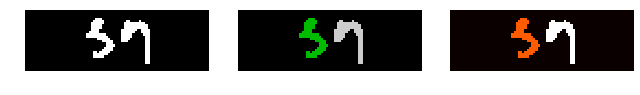

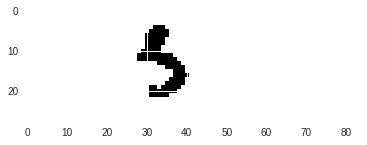

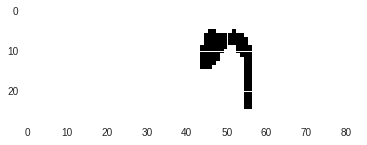

Is segmentation correct? True


In [0]:
image_digits, correct_segmentation = segment_image_transpose(x_first[1], numbers_first[1])

for image_digit in image_digits:
    plt.imshow(image_digit)
    plt.show()
    
print("Is segmentation correct?", correct_segmentation)


In [0]:
def segment_image_transpose_test(im):
  sigma = 0.33

  nr_correct_segment = 0
  
  im = np.transpose(im)
  
  im = filters.gaussian(im, sigma=sigma)
  blobs = im > 0.7 * im.mean()

  blobs_labels = measure.label(blobs, background=0)
  distinct_labels = np.unique(blobs_labels)
  
  image_digits = []
  
  for (i,label) in enumerate(distinct_labels[1:]):
    image_digit = np.where(blobs_labels==label, blobs_labels, 0)
    image_digits.append(np.transpose(image_digit))
    
  
  return image_digits  
  

In [0]:
def separate_nr_digits(number):
   return [int(i) for i in str(number)]  

In [0]:
print(numbers_first.shape)
numbers_first = numbers_first.flatten()
print(numbers_first.shape)

(10000, 1)
(10000,)


In [0]:
print(numbers_second.shape)
numbers_second = numbers_second.flatten()
print(numbers_second.shape)

(10000,)
(10000,)


In [0]:
x_train_first = np.empty((1,28,84))
labels_first = np.empty(1)

for i in range (1,NR_SAMPLES):
  number_digits = separate_nr_digits(numbers_first[i])
  
  image_digits, correct_segmentation = segment_image_transpose(x_first[i], numbers_first[i], plot=False, verbose=False)
    
  if correct_segmentation:
    for image in image_digits:
      x_train_first = np.append(x_train_first, image.reshape(1,28,84), axis=0)  
    labels_first = np.append(labels_first,number_digits)
    
#   for image_digit in image_digits:
#       plt.imshow(image_digit)
#       plt.show()
  
print(numbers_first[i])
print(number_digits)  
print(x_train_first.shape)
print(labels_first)


116
[1, 1, 6]
(21932, 28, 84)
[4. 3. 7. ... 1. 1. 6.]


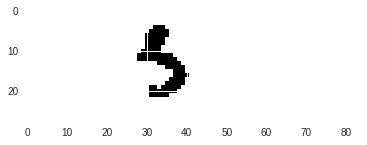

3.0


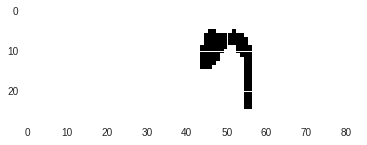

7.0


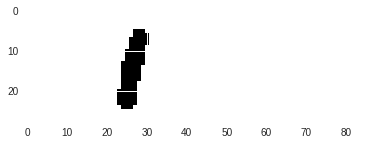

1.0


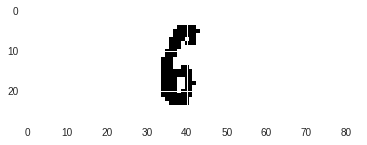

6.0


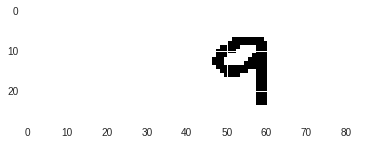

9.0


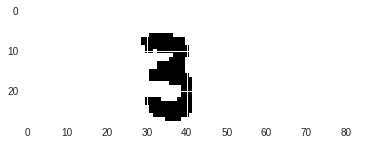

3.0


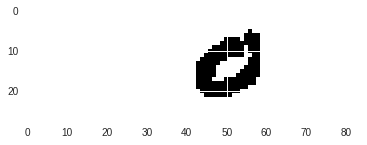

0.0


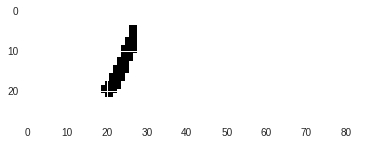

1.0


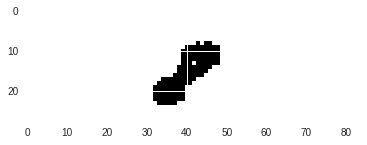

8.0


In [0]:
for i in range(1,10):
  plt.imshow(x_train_first[i])
  plt.show()
  print(labels_first[i])  

In [0]:
x_train_first
print(x_train_first.shape)
# x_train_first = x_train_first.reshape()

labels_first
# x_train_first = np.expand_dims(x_train_first, 0)
# x_test = np.expand_dims(x_test, -1)

x_train_first = x_train_first.reshape(len(labels_first),1,28,84)
print(x_train_first.shape)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3),input_shape=(1,28,84), activation='relu', padding='same'))
# model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), input_shape = (28,28,32), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# model.summary()

(21932, 1, 28, 84)
(21932, 1, 28, 84)


In [0]:
model.fit(x_train_first, labels_first, epochs=10)
# model.evaluate(x_test, y_test)

Epoch 1/10
21932/21932 [==============================] - 4s 198us/step - loss: 1.8790 - acc: 0.3586
Epoch 2/10
21932/21932 [==============================] - 4s 192us/step - loss: 1.3387 - acc: 0.5342
Epoch 3/10
21932/21932 [==============================] - 4s 185us/step - loss: 1.1821 - acc: 0.5858
Epoch 4/10
21932/21932 [==============================] - 4s 190us/step - loss: 1.0386 - acc: 0.6496
Epoch 5/10
21932/21932 [==============================] - 4s 193us/step - loss: 0.9107 - acc: 0.7006
Epoch 6/10
21932/21932 [==============================] - 4s 192us/step - loss: 0.8040 - acc: 0.7392
Epoch 7/10
21932/21932 [==============================] - 4s 188us/step - loss: 0.7243 - acc: 0.7693
Epoch 8/10
21932/21932 [==============================] - 4s 186us/step - loss: 0.6620 - acc: 0.7911
Epoch 9/10
21932/21932 [==============================] - 4s 191us/step - loss: 0.6165 - acc: 0.8103
Epoch 10/10
21932/21932 [==============================] - 4s 190us/step - loss: 0.5792 - a

In [0]:
from keras.models import load_model

model.summary()
model.save('Digits_recog_model1_10epoch.h5')  # creates a HDF5 file 'my_model.h5'

# Forloading model:
# model = load_model('RNN_sum_model.h5')
# model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 1, 28, 32)         24224     
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 1, 28, 32)         9248      
_________________________________________________________________
flatten_14 (Flatten)         (None, 896)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                8970      
Total params: 42,442
Trainable params: 42,442
Non-trainable params: 0
_________________________________________________________________


### Train 20 epochs more and save

In [0]:
model.fit(x_train_first, labels_first, epochs=20)
# model.evaluate(x_test, y_test)

Epoch 1/20
21932/21932 [==============================] - 5s 230us/step - loss: 0.5207 - acc: 0.8361
Epoch 2/20
21932/21932 [==============================] - 5s 238us/step - loss: 0.5003 - acc: 0.8419
Epoch 3/20
21932/21932 [==============================] - 5s 237us/step - loss: 0.4822 - acc: 0.8500
Epoch 4/20
21932/21932 [==============================] - 5s 236us/step - loss: 0.4653 - acc: 0.8567
Epoch 5/20
21932/21932 [==============================] - 5s 235us/step - loss: 0.4490 - acc: 0.8607
Epoch 6/20
21932/21932 [==============================] - 5s 236us/step - loss: 0.4326 - acc: 0.8665
Epoch 7/20
21932/21932 [==============================] - 5s 237us/step - loss: 0.4247 - acc: 0.8699
Epoch 8/20
21932/21932 [==============================] - 5s 236us/step - loss: 0.4099 - acc: 0.8746
Epoch 9/20
21932/21932 [==============================] - 5s 240us/step - loss: 0.3982 - acc: 0.8789
Epoch 10/20
21932/21932 [==============================] - 5s 235us/step - loss: 0.3857 - a

In [0]:

model.save('Digits_recog_model1_30epoch.h5')  # creates a HDF5 file 'my_model.h5'

# Forloading model:
# model = load_model('RNN_sum_model.h5')
# model.summary()

### Evaluate model performance on second column of integers

## TODO: run on the entire dataset  of tests and use the generate test set function!

In [0]:

x_train_test = np.empty((0,28,84))
labels_second = np.empty(0)
nr_images = 0

print(x_second.shape)

x_second = x_second.reshape(NR_SAMPLES, 28,84)

for (idx, image) in enumerate(x_second[0:100]):
 
  number_digits = separate_nr_digits(numbers_second[idx])
  
  labels_second = np.append(labels_second,number_digits)
#   plt.imshow(image)
#   plt.show()
#   print(labels_second)
#   print(labels_second.shape)
  
#   print(number_digits)
  
  image_digits, correct_segm = segment_image_transpose(image, numbers_second[idx], plot=False, verbose=False)
  
  nr_images_current = 0
  
  for image_digit in image_digits:
#       plt.imshow(image_digit)
#       plt.show()
      nr_images += 1
      nr_images_current += 1
      
      x_train_test = np.append(x_train_test, image_digit.reshape(1,28,84), axis=0)  
  

#   In case digits were not separated properly:
  diff_length = len(number_digits) - len(image_digits)
  if (diff_length>0):
    x_train_test = np.append(x_train_test, np.zeros((1,28,84))*diff_length, axis=0)
  elif (diff_length<0):
    #   if more numbers in images than digits, add digits in labels
    labels_second = np.append(labels_second, np.zeros(1)*diff_length, axis=0)
    
    
nr_images = len(labels_second)

print(x_train_test.shape)
print(nr_images)
# print(x_train_test[0])
x_train_test = x_train_test.reshape(nr_images,1,28,84)

# model = tf.keras.models.load_model('Digits_recog_model1_10epoch.h5')

model = tf.keras.models.load_model('Digits_recog_model1_30epoch.h5')

prediction = np.round(model.predict(x_train_test))


model.evaluate(x_train_test, labels_second[0:nr_images].astype(int))



(10000, 28, 84)
(257, 28, 84)
257
257/257 [==============================] - 2s 6ms/step


[1.0903886667369405, 0.7821011673151751]

In [0]:
from numpy import argmax
print("predicted : actual")
for (i,predicted) in enumerate(prediction):
  print(argmax(predicted), " : ", labels_second[i].astype(int))
  

predicted : actual
1  :  1
0  :  0
5  :  5
4  :  4
9  :  8
0  :  0
1  :  1
2  :  2
1  :  1
2  :  2
1  :  1
0  :  0
0  :  7
8  :  8
4  :  4
5  :  5
1  :  1
4  :  9
3  :  3
4  :  4
2  :  2
2  :  2
3  :  3
9  :  4
1  :  1
6  :  6
1  :  1
9  :  9
5  :  5
1  :  1
0  :  0
3  :  3
8  :  8
1  :  1
8  :  8
0  :  8
1  :  1
3  :  3
0  :  8
1  :  1
4  :  4
6  :  6
5  :  5
1  :  1
1  :  1
0  :  0
7  :  7
2  :  2
0  :  0
4  :  4
2  :  2
4  :  4
2  :  3
1  :  1
3  :  3
6  :  6
2  :  3
9  :  9
1  :  1
2  :  2
7  :  7
8  :  8
2  :  2
5  :  5
4  :  4
3  :  3
9  :  9
1  :  1
4  :  4
3  :  3
1  :  1
7  :  7
7  :  7
1  :  1
0  :  0
6  :  6
0  :  5
0  :  6
6  :  1
3  :  8
0  :  3
2  :  2
9  :  0
0  :  7
1  :  1
7  :  7
2  :  2
6  :  5
3  :  3
1  :  1
9  :  4
2  :  2
2  :  2
2  :  2
1  :  1
2  :  4
1  :  1
1  :  1
3  :  3
6  :  1
4  :  6
1  :  1
1  :  1
0  :  1
6  :  6
0  :  8
0  :  0
4  :  4
1  :  1
1  :  1
6  :  6
5  :  5
2  :  2
9  :  9
1  :  1
2  :  2
8  :  8
2  :  2
1  :  1
1  :  6
6  :  0
2  :  2
7  : 

## Task 2: Addition

Building a recurrent neural network that adds 2 numbers

Strategy: use an encoder-decoder (sequence 2 sequence) model

### Generate dataset or use dataset already generated for task 1

In [0]:
NR_SAMPLES = 10000
generator = training_generator(batch_size=NR_SAMPLES) # batch size of 8

x, numbers, numbers_sum = next(generator)

## Step 1 - Encoding

In [552]:
def encode_numbers(numbers_dataset, is_train=False, max_lenght = 3):
  n = len(numbers_dataset)
#   print(numbers_dataset[0][0])
  X = np.zeros((n, (max_lenght)*2, 11))
  Y = np.zeros((n, max_lenght, 11))
  
  for i in range(n):
    a = numbers_dataset[i][0]
    b = numbers_dataset[i][1]
    
    if(is_train):
      s = a + b
      s = [int(i) for i in str(s)]

    a = [int(i) for i in str(a)]
    b = [int(i) for i in str(b)]
  
    print(a,b)
    
    if is_train:
      a,b,s = pad_sequences([a,b,s],maxlen = max_lenght, value=10)
      x , y = np.concatenate([a,b]), s
    else:
      a,b = pad_sequences([a,b],maxlen = max_lenght, value=10)
      x = np.concatenate([a,b])

    for j, char in enumerate(x):
         X[i, j, char] = 1
     
    if(is_train):
      for j, char in enumerate(s):
         Y[i, j, char] = 1
          
  if(is_train):
      return X, Y
  return X

X , Y = encode_numbers(numbers, True)

# print(numbers[0:10])
# print(X[0:10])
# print(Y[0:10])


[2, 5, 1] [1, 0, 5]
[3, 7] [4]
[1, 4, 4] [8, 0]
[1, 6, 9] [1, 2, 1]
[3, 0] [2, 1, 0]
[1, 4, 0] [7, 8]
[1, 8, 5] [4, 5]
[1, 7] [1, 9, 3]
[1, 1] [4, 2]
[2, 4, 8] [2, 3, 4]
[2, 3, 9] [1, 6]
[1, 2, 8] [1, 9, 5]
[1, 9, 5] [1, 0, 3]
[1, 6, 2] [8, 1]
[9, 8] [8, 8]
[1, 1, 9] [1, 3, 8]
[9, 0] [1, 4, 6]
[1, 3, 5] [5, 1]
[1, 1, 8] [1, 0, 7]
[2, 1, 2] [2, 0, 4]
[2, 5, 0] [2, 4, 3]
[2, 0, 4] [1, 3, 6]
[7, 0] [3, 9]
[2, 2, 3] [1, 2, 7]
[7, 4] [8]
[1, 7, 0] [2, 5, 4]
[2, 5, 1] [3, 9]
[1, 3, 6] [1, 4, 3]
[6, 1] [1, 7, 7]
[1, 2, 9] [1, 0, 6]
[6, 7] [5, 6]
[7, 9] [1, 8, 3]
[1, 8, 2] [2, 0, 7]
[1, 6, 2] [1, 7, 2]
[1, 4, 3] [5, 3]
[2, 6] [1, 4, 2]
[4, 5] [2, 2, 1]
[1, 1, 4] [4, 1]
[1, 5, 8] [1, 3]
[1, 3, 2] [1, 6, 1]
[2, 3, 3] [1, 1, 6]
[4, 8] [8, 0]
[4, 7] [4, 1]
[7, 5] [1, 6, 5]
[1, 5, 6] [2, 9]
[1, 5, 2] [1, 2, 8]
[3, 8] [2, 1, 6]
[2, 4, 0] [2, 7]
[2, 4, 1] [2, 2, 7]
[6, 0] [7, 4]
[4, 2] [1, 5, 5]
[1, 0, 4] [1, 8, 8]
[1, 2, 4] [4, 7]
[1, 5, 8] [1, 9, 8]
[2, 4, 3] [4, 2]
[3, 0] [2, 1, 4]
[1, 4, 4] [0]
[

### Step2 - Configure network and train model

In [574]:
alphabet = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' ']
chars_len = len(alphabet)

input_len = 6
output_len = 3

model = Sequential()
model.add(LSTM(100, input_shape=(input_len, chars_len)))
model.add(RepeatVector(output_len))
model.add(LSTM(50, return_sequences=True))
model.add(TimeDistributed(Dense(chars_len, activation='softmax')))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 100)               44800     
_________________________________________________________________
repeat_vector_8 (RepeatVecto (None, 3, 100)            0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 3, 50)             30200     
_________________________________________________________________
time_distributed_8 (TimeDist (None, 3, 11)             561       
Total params: 75,561
Trainable params: 75,561
Non-trainable params: 0
_________________________________________________________________
None


In [575]:
# model.fit(X, Y, epochs=20)
model.fit(X, Y, epochs=100)



Epoch 1/100
10000/10000 [==============================] - 15s 1ms/step - loss: 2.0098 - acc: 0.2321
Epoch 2/100
10000/10000 [==============================] - 9s 884us/step - loss: 1.7690 - acc: 0.3039
Epoch 3/100
10000/10000 [==============================] - 9s 890us/step - loss: 1.7107 - acc: 0.3313
Epoch 4/100
10000/10000 [==============================] - 9s 892us/step - loss: 1.6483 - acc: 0.3627
Epoch 5/100
10000/10000 [==============================] - 9s 893us/step - loss: 1.5954 - acc: 0.3909
Epoch 6/100
10000/10000 [==============================] - 9s 888us/step - loss: 1.5439 - acc: 0.4107
Epoch 7/100
10000/10000 [==============================] - 9s 890us/step - loss: 1.4663 - acc: 0.4448
Epoch 8/100
10000/10000 [==============================] - 9s 894us/step - loss: 1.3913 - acc: 0.4819
Epoch 9/100
10000/10000 [==============================] - 9s 893us/step - loss: 1.3319 - acc: 0.5022
Epoch 10/100
10000/10000 [==============================] - 9s 885us/step - loss: 1

## Decode

In [576]:
def decode(encoded_seq):
	return [argmax(vector) for vector in encoded_seq]

def integer_combine(n_array):
  result = 0
  for num in n_array:
    if(num!=10):
      result = result * 10 + round(num)
  return result

y = Y.astype(int)

print(y.shape)
result1 = [integer_combine(decode(x)) for x in y]
print(result1)


(10000, 3, 11)
[356, 41, 224, 290, 240, 218, 230, 210, 53, 482, 255, 323, 298, 243, 186, 257, 236, 186, 225, 416, 493, 340, 109, 350, 82, 424, 290, 279, 238, 235, 123, 262, 389, 334, 196, 168, 266, 155, 171, 293, 349, 128, 88, 240, 185, 280, 254, 267, 468, 134, 197, 292, 171, 356, 285, 244, 144, 64, 230, 210, 355, 234, 237, 255, 139, 219, 236, 243, 207, 385, 267, 427, 98, 375, 417, 322, 414, 296, 249, 294, 295, 314, 421, 145, 224, 335, 324, 254, 208, 93, 86, 273, 164, 222, 148, 390, 184, 300, 111, 99, 193, 121, 409, 206, 163, 238, 236, 223, 464, 274, 268, 151, 322, 304, 276, 259, 101, 318, 92, 195, 345, 253, 180, 291, 429, 376, 156, 277, 124, 300, 165, 448, 168, 346, 250, 109, 216, 314, 378, 276, 211, 238, 355, 219, 190, 282, 228, 269, 98, 173, 292, 325, 215, 291, 244, 368, 306, 325, 309, 354, 354, 179, 207, 251, 172, 51, 161, 254, 66, 252, 259, 138, 278, 115, 364, 177, 172, 339, 323, 115, 401, 122, 352, 249, 340, 280, 109, 317, 405, 218, 132, 253, 287, 199, 187, 204, 302, 322, 144, 42

### Test on new data and evaluate performance

Generate test set:

In [0]:
NR_SAMPLES_TEST = 3000
generator = test_generator(batch_size=NR_SAMPLES_TEST)

x_test, numbers_test, numbers_sum_test = next(generator)


In [578]:
print(numbers_test[1])
print(numbers[1])

[78 19]
[37  4]


In [579]:
X_test, Y_test = encode_numbers(numbers_test, True)

[3, 9] [1, 5, 2]
[7, 8] [1, 9]
[6, 0] [1, 4, 9]
[8, 0] [1, 2, 4]
[1, 5, 7] [2, 4, 0]
[6, 8] [1, 6, 5]
[1, 0, 2] [1, 3, 3]
[1, 8, 7] [1, 7, 4]
[2, 1, 4] [2, 3, 3]
[2, 4, 5] [1, 9, 0]
[1, 2, 1] [9, 6]
[1, 8, 6] [5, 0]
[1, 7, 2] [2, 4, 4]
[2] [2, 3]
[1, 6, 8] [7, 3]
[5, 5] [6, 3]
[6, 7] [1, 6, 8]
[2, 2, 9] [1, 9, 8]
[2, 2, 8] [1, 2, 1]
[1, 0, 1] [1, 6, 8]
[5, 6] [2, 3, 9]
[2, 4, 1] [2, 3, 7]
[1, 0, 8] [2, 4, 2]
[1, 1, 9] [1, 2, 8]
[4, 2] [4, 7]
[1, 9, 7] [2, 3, 3]
[1, 8, 8] [0]
[1, 3, 7] [1, 4, 2]
[1, 5, 4] [1, 3, 2]
[2, 9] [2, 4, 4]
[6, 9] [5, 9]
[1, 0, 5] [1, 4, 6]
[2, 4, 0] [1, 5, 0]
[2, 3, 5] [8, 3]
[2, 4, 6] [1, 6, 6]
[7, 5] [1, 8, 4]
[2, 8] [9, 8]
[1, 6, 6] [2, 3, 2]
[2, 2, 4] [5, 4]
[1, 9, 9] [1, 1, 2]
[2, 3] [6]
[3, 6] [5, 6]
[2, 3, 2] [8, 3]
[2, 2, 3] [2, 4]
[1, 7] [8, 1]
[4, 7] [4, 7]
[7, 6] [2, 0, 0]
[2, 4, 9] [1, 0, 6]
[5, 0] [5, 6]
[1, 4, 4] [1, 2, 1]
[1, 6] [2, 4, 6]
[2, 3, 7] [7, 7]
[1, 5, 3] [1, 1, 8]
[2, 4, 7] [6, 0]
[2, 4, 3] [1, 9, 1]
[1, 9, 5] [2, 6]
[1, 6, 2] [1, 2, 6

3000/3000 [==============================] - 1s 317us/step
Loss on test set: 0.030332
Accuracy on test set: 0.992222
Mean squared error: 24.001000
--First 20 examples result:--
Expected=191, Predicted=191
Difference=0
Expected=97, Predicted=97
Difference=0
Expected=209, Predicted=209
Difference=0
Expected=204, Predicted=204
Difference=0
Expected=397, Predicted=397
Difference=0
Expected=233, Predicted=233
Difference=0
Expected=235, Predicted=235
Difference=0
Expected=361, Predicted=361
Difference=0
Expected=447, Predicted=457
Difference=10
Expected=435, Predicted=435
Difference=0
Expected=217, Predicted=217
Difference=0
Expected=236, Predicted=236
Difference=0
Expected=416, Predicted=416
Difference=0
Expected=25, Predicted=25
Difference=0
Expected=241, Predicted=241
Difference=0
Expected=118, Predicted=118
Difference=0
Expected=235, Predicted=235
Difference=0
Expected=427, Predicted=427
Difference=0
Expected=349, Predicted=349
Difference=0
Expected=269, Predicted=269
Difference=0


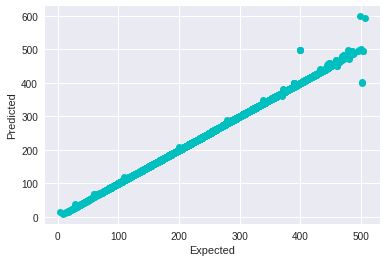

In [581]:
result = model.predict(X_test)

# predicted = [invert(x, alphabet) for x in result]
predicted = [integer_combine(decode(x)) for x in result]
expected = [integer_combine(decode(x)) for x in Y_test]

loss, acc = model.evaluate(X_test, Y_test)

print("Loss on test set: %f" % loss)
print("Accuracy on test set: %f" % acc)
# print("Mean squared error:")
print('Mean squared error: %f' % mse)
mse = mean_squared_error(expected, predicted)

# rmse = sqrt(mean_squared_error(expected, predicted))
# print('RMSE: %f' % rmse)

print("--First 20 examples result:--")
for i in range(20):
	print('Expected=%s, Predicted=%s' % (expected[i], predicted[i]))
	print('Difference=%s' % (abs(expected[i] - predicted[i])))
  
plt.plot(expected, predicted, 'oc')
plt.xlabel("Expected")
plt.ylabel("Predicted")

plt.show()